<a href="https://colab.research.google.com/github/prathyusha1311/Personality-Prediction-system/blob/main/Personality_Prediction_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Personality Prediction Using Machine learning**
**Done by N Prathyusha**

Used Mini Batch Kmeans clustering to segregate data into 10 personalities

Performed Standardazation for feature scaling


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project /data-final.csv', delimiter='\t')

In [ ]:
df

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,...,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,...,4750.0,5475.0,11641.0,3115.0,3207.0,3260.0,10235.0,5897.0,1758.0,3081.0,6602.0,5457.0,1569.0,2129.0,3762.0,4420.0,9382.0,5286.0,4983.0,6339.0,3146.0,4067.0,2959.0,3411.0,2170.0,4920.0,4436.0,3116.0,2992.0,4354.0,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,...,2158.0,2090.0,2143.0,2807.0,3422.0,5324.0,4494.0,3627.0,1850.0,1747.0,5163.0,5240.0,7208.0,2783.0,4103.0,3431.0,3347.0,2399.0,3360.0,5595.0,2624.0,4985.0,1684.0,3026.0,4742.0,3336.0,2718.0,3374.0,3096.0,3019.0,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,...,1089.0,2203.0,3386.0,1464.0,2562.0,1493.0,3067.0,13719.0,3892.0,4100.0,4286.0,4775.0,2713.0,2813.0,4237.0,6308.0,2690.0,1516.0,2379.0,2983.0,1930.0,1470.0,1644.0,1683.0,2229.0,8114.0,2043.0,6295.0,1585.0,2529.0,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,...,6062.0,11952.0,1040.0,2264.0,3664.0,3049.0,4912.0,7545.0,4632.0,6896.0,2824.0,520.0,2368.0,3225.0,2848.0,6264.0,3760.0,10472.0,3192.0,7704.0,3456.0,6665.0,1977.0,3728.0,4128.0,3776.0,2984.0,4192.0,3480.0,3257.0,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,...,6771.0,2819.0,3682.0,2511.0,16204.0,1736.0,28983.0,1612.0,2437.0,4532.0,3843.0,7019.0,3102.0,3153.0,2869.0,6550.0,1811.0,3682.0,21500.0,20587.0,8458.0,3510.0,17042.0,7029.0,2327.0,5835.0,6846.0,5320.0,11401.0,8642.0,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,3.0,3.0,5.0,4.0,2.0,5.0,2.0,4.0,2.0,4.0,4.0,4.0,2.0,3.0,3.0,3.0,4.0,4.0,4.0,2.0,3.0,3.0,...,1655.0,1937.0,1233.0,3151.0,2576.0,1888.0,2815.0,2964.0,2665.0,2888.0,3008.0,2367.0,2504.0,2544.0,2144.0,4784.0,3529.0,5072.0,2016.0,3353.0,2649.0,3544.0,7577.0,3096.0,1896.0,3912.0,2744.0,2025.0,1873.0,1232.0,2018-11-08 12:04:58,1920.0,1080.0,3.0,160.0,10,2,US,39.9883,-75.2208
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,4.0,3.0,5.0,1.0,5.0,5.0,4.0,4.0,4.0,5.0,2.0,4.0,1.0,4.0,3.0,5.0,3.0,3.0,5.0,3.0,3.0,2.0,3.0,4.0,3.0,3.0,2.0,3.0,2.0,3.0,...,2422.0,1448.0,3216.0,6160.0,2208.0,1513.0,2785.0,3833.0,3280.0,1184.0,2096.0,1880.0,3209.0,1744.0,4392.0,1943.0,2263.0,1559.0,1304.0,2176.0,2560.0,6632.0,2312.0,2376.0,2969.0,2271.0,4064.0,1144.0,2936.0,1615.0,2018-11-08 12:07:18,1920.0,1080.0,3.0,122.0,7,1,US,38.0,-97.0
1015338,4.0,2.0,4.0,3.0,5.0,1

In [ ]:
columns = df.columns

In [ ]:
for column in columns:
  print(column)

EXT1
EXT2
EXT3
EXT4
EXT5
EXT6
EXT7
EXT8
EXT9
EXT10
EST1
EST2
EST3
EST4
EST5
EST6
EST7
EST8
EST9
EST10
AGR1
AGR2
AGR3
AGR4
AGR5
AGR6
AGR7
AGR8
AGR9
AGR10
CSN1
CSN2
CSN3
CSN4
CSN5
CSN6
CSN7
CSN8
CSN9
CSN10
OPN1
OPN2
OPN3
OPN4
OPN5
OPN6
OPN7
OPN8
OPN9
OPN10
EXT1_E
EXT2_E
EXT3_E
EXT4_E
EXT5_E
EXT6_E
EXT7_E
EXT8_E
EXT9_E
EXT10_E
EST1_E
EST2_E
EST3_E
EST4_E
EST5_E
EST6_E
EST7_E
EST8_E
EST9_E
EST10_E
AGR1_E
AGR2_E
AGR3_E
AGR4_E
AGR5_E
AGR6_E
AGR7_E
AGR8_E
AGR9_E
AGR10_E
CSN1_E
CSN2_E
CSN3_E
CSN4_E
CSN5_E
CSN6_E
CSN7_E
CSN8_E
CSN9_E
CSN10_E
OPN1_E
OPN2_E
OPN3_E
OPN4_E
OPN5_E
OPN6_E
OPN7_E
OPN8_E
OPN9_E
OPN10_E
dateload
screenw
screenh
introelapse
testelapse
endelapse
IPC
country
lat_appx_lots_of_err
long_appx_lots_of_err


In [ ]:
X =df[df.columns[0:50]]

In [ ]:
pd.set_option("display.max_columns",None)

In [ ]:
X

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,3.0,3.0,5.0,4.0,2.0,5.0,2.0,4.0,2.0,4.0,4.0,4.0,2.0,3.0,3.0,3.0,4.0,4.0,4.0,2.0,3.0,3.0,2.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,2.0,4.0
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,4.0,3.0,5.0,1.0,5.0,5.0,4.0,4.0,4.0,5.0,2.0,4.0,1.0,4.0,3.0,5.0,3.0,3.0,5.0,3.0,3.0,2.0,3.0,4.0,3.0,3.0,2.0,3.0,2.0,3.0,4.0,1.0,5.0,1.0,5.0,1.0,3.0,4.0,5.0,4.0
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,3.0,2.0,4.0,3.0,2.0,2.0,4.0,2.0,4.0,1.0,3.0,5.0,5.0,3.0,2.0,3.0,2.0,4.0,3.0,5.0,4.0,5.0,3.0,5.0,1.0,5.0,1.0,4.0,1.0,4.0,5.0,1.0,5.0,1.0,4.0,1.0,5.0,5.0,4.0,5.0
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,4.0,3.0,4.0,2.0,4.0,4.0,2.0,2.0,4.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,3.0,4.0,2.0,4.0,2.0,2.0,2.0,4.0,2.0,4.0,4.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,5.0,5.0,3.0


In [ ]:
X =X.fillna(0)

In [ ]:
from sklearn.cluster import MiniBatchKMeans

In [ ]:
kmeans = MiniBatchKMeans(n_clusters=10,random_state=0, batch_size= 100,max_iter=100 ).fit(X)

In [ ]:
len(kmeans.cluster_centers_)

10

In [ ]:
one = kmeans.cluster_centers_[0] #personality 1
two = kmeans.cluster_centers_[1] # personality 2

In [ ]:
three = kmeans.cluster_centers_[2]
four = kmeans.cluster_centers_[3]
five = kmeans.cluster_centers_[4]
six = kmeans.cluster_centers_[5]
seven = kmeans.cluster_centers_[6]
eight = kmeans.cluster_centers_[7]
nine = kmeans.cluster_centers_[8]
ten = kmeans.cluster_centers_[9]

**One** variable here is the typical personality type 1 who would answer those 50 questions in certain way. The correlation of the ans are represented in the form of numbers in the numpy array **one**.

In [ ]:
one

array([1.93983934, 3.62299673, 2.80859288, 3.83687207, 2.45220409,
       2.9566675 , 1.91850177, 3.95175052, 2.47718339, 4.23629097,
       2.31209655, 3.96665922, 3.16344346, 3.00845352, 2.27520608,
       1.88191368, 2.20033393, 1.77677715, 2.29170556, 2.33806187,
       2.46934778, 3.39960296, 2.23424004, 3.54805885, 2.689652  ,
       3.32537502, 2.65042136, 3.3468835 , 3.2720508 , 3.27303682,
       2.9157409 , 3.49625968, 3.72152032, 2.75739847, 1.97141843,
       3.36907563, 3.26358413, 2.72897467, 2.49556289, 3.35670431,
       3.77605406, 1.79812787, 3.97993768, 1.80794867, 3.78508605,
       1.87929742, 4.11344543, 3.30080328, 4.14278953, 3.93677609])

So based on the questions asked and answers given by the personality type one the degree of introversion , extroversion , socialization, some characteristics and so on varies from one personality to personality. the degrees or the scores of these characteristics are calculated for each personality.

In [ ]:
one_scores={}
one_scores['extroversion_score'] =  one[0] - one[1] + one[2] - one[3] + one[4] - one[5] + one[6] - one[7] + one[8] - one[9]
one_scores['neuroticism_score'] =  one[0] - one[1] + one[2] - one[3] + one[4] + one[5] + one[6] + one[7] + one[8] + one[9]
one_scores['agreeableness_score'] =  -one[0] + one[1] - one[2] + one[3] - one[4] - one[5] + one[6] - one[7] + one[8] + one[9]
one_scores['conscientiousness_score'] =  one[0] - one[1] + one[2] - one[3] + one[4] - one[5] + one[6] - one[7] + one[8] + one[9]
one_scores['openness_score'] =  one[0] - one[1] + one[2] - one[3] + one[4] - one[5] + one[6] + one[7] + one[8] + one[9]

so the One_score gives the degree of extrovertion , conscientiousness, agreeableness, neuroticism, openness of the personality type 1

In [ ]:
one_scores

{'agreeableness_score': 1.982790581491693,
 'conscientiousness_score': 1.4643256248110226,
 'extroversion_score': -7.008256313845145,
 'neuroticism_score': 15.281161668616864,
 'openness_score': 9.367826669997259}

In [ ]:
all_types = {'one':one, 'two': two, 'three' :three, 'four':four, 'five':five, 'six': six, 'seven': seven, 'eight': eight,
             'nine': nine, 'ten': ten}

In [ ]:
all_types_scores = {}

The scores for each personality is calculated and printed below 

In [ ]:
for name, personality_type in all_types.items():
    personality_trait = {}

    personality_trait['extroversion_score'] =  personality_type[0] - personality_type[1] +personality_type[2] - personality_type[3] + personality_type[4] - personality_type[5] +personality_type[6] - personality_type[7] + personality_type[8] -personality_type[9]
    personality_trait['neuroticism_score'] =  personality_type[0] - personality_type[1] + personality_type[2] -personality_type[3] + personality_type[4] + personality_type[5] + personality_type[6] + personality_type[7] + personality_type[8] + personality_type[9]
    personality_trait['agreeableness_score'] =  -personality_type[0] +personality_type[1] - personality_type[2] + personality_type[3] - personality_type[4] - personality_type[5] + personality_type[6] - personality_type[7] + personality_type[8] + personality_type[9]
    personality_trait['conscientiousness_score'] = personality_type[0] - personality_type[1] + personality_type[2] -personality_type[3] +personality_type[4] - personality_type[5] +personality_type[6] -personality_type[7] + personality_type[8] + personality_type[9]
    personality_trait['openness_score'] =  personality_type[0] -personality_type[1] + personality_type[2] - personality_type[3] + personality_type[4] - personality_type[5] +personality_type[6] + personality_type[7] + personality_type[8] + personality_type[9]
    
    all_types_scores[name] = personality_trait


In [ ]:
all_types_scores

{'eight': {'agreeableness_score': 1.837384510014969,
  'conscientiousness_score': -1.5771773618663172,
  'extroversion_score': -10.624966803181268,
  'neuroticism_score': 14.07190081489447,
  'openness_score': 7.005017961226031},
 'five': {'agreeableness_score': -1.5335845288895271,
  'conscientiousness_score': 14.898622386516248,
  'extroversion_score': 9.752671429080795,
  'neuroticism_score': 22.830704496558937,
  'openness_score': 19.70058599089515},
 'four': {'agreeableness_score': 0.20233759048363087,
  'conscientiousness_score': 4.839111992254154,
  'extroversion_score': -3.034395315597741,
  'neuroticism_score': 17.494029231407637,
  'openness_score': 12.743326110009697},
 'nine': {'agreeableness_score': -0.49313408723747965,
  'conscientiousness_score': 0.764539579967688,
  'extroversion_score': 0.4046849757673654,
  'neuroticism_score': 1.441841680129238,
  'openness_score': 1.056138933764134},
 'one': {'agreeableness_score': 1.982790581491693,
  'conscientiousness_score': 1.

Performing Normalization on all the characterisitc 

In [ ]:
all_extroversion = []
all_neuroticism =[]
all_agreeableness =[]
all_conscientiousness =[]
all_openness =[]

for personality_type, personality_trait in all_types_scores.items():
    all_extroversion.append(personality_trait['extroversion_score'])
    all_neuroticism.append(personality_trait['neuroticism_score'])
    all_agreeableness.append(personality_trait['agreeableness_score'])
    all_conscientiousness.append(personality_trait['conscientiousness_score'])
    all_openness.append(personality_trait['openness_score'])

In [ ]:
all_extroversion_normalized = (all_extroversion-min(all_extroversion))/(max(all_extroversion)-min(all_extroversion))
all_neuroticism_normalized = (all_neuroticism-min(all_neuroticism))/(max(all_neuroticism)-min(all_neuroticism))
all_agreeableness_normalized = (all_agreeableness-min(all_agreeableness))/(max(all_agreeableness)-min(all_agreeableness))
all_conscientiousness_normalized = (all_conscientiousness-min(all_conscientiousness))/(max(all_conscientiousness)-min(all_conscientiousness))
all_openness_normalized = (all_openness-min(all_openness))/(max(all_openness)-min(all_openness))

In [ ]:
all_extroversion_normalized

array([0.16999693, 0.0185651 , 0.31117419, 0.35678107, 0.95781399,
       0.67314373, 1.        , 0.        , 0.51842881, 0.60021362])

In [ ]:
counter = 0

normalized_all_types_scores ={}

for personality_type, personality_trait in all_types_scores.items():
    normalized_personality_trait ={}
    normalized_personality_trait['extroversion_score'] = all_extroversion_normalized[counter]
    normalized_personality_trait['neuroticism_score'] = all_neuroticism_normalized[counter]
    normalized_personality_trait['agreeableness_score'] = all_agreeableness_normalized[counter]
    normalized_personality_trait['conscientiousness_score'] = all_conscientiousness_normalized[counter]
    normalized_personality_trait['openness_score'] = all_openness_normalized[counter]
    
    normalized_all_types_scores[personality_type] = normalized_personality_trait
    
    counter+=1

In [ ]:
normalized_all_types_scores

{'eight': {'agreeableness_score': 0.7887561460017004,
  'conscientiousness_score': 0.0,
  'extroversion_score': 0.0,
  'neuroticism_score': 0.5729202057359556,
  'openness_score': 0.3061873721398432},
 'five': {'agreeableness_score': 0.22070723029991093,
  'conscientiousness_score': 0.9845235809413106,
  'extroversion_score': 0.9578139909480959,
  'neuroticism_score': 0.9702339121688376,
  'openness_score': 0.9596252038527343},
 'four': {'agreeableness_score': 0.5132310316971305,
  'conscientiousness_score': 0.3834101086288353,
  'extroversion_score': 0.3567810698782899,
  'neuroticism_score': 0.7281535657324153,
  'openness_score': 0.6015367118211288},
 'nine': {'agreeableness_score': 0.39603567099480574,
  'conscientiousness_score': 0.13993102516020076,
  'extroversion_score': 0.5184288124438764,
  'neuroticism_score': 0.0,
  'openness_score': 0.0},
 'one': {'agreeableness_score': 0.8132588217265576,
  'conscientiousness_score': 0.18174725704475928,
  'extroversion_score': 0.16999692

Graphical Representation of each personalities with their traits

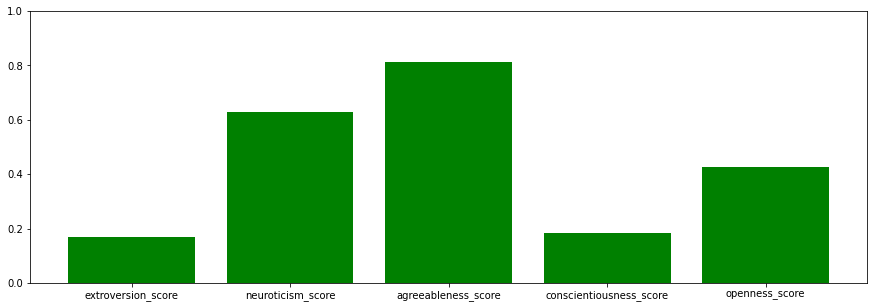

In [ ]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['one'].keys()), normalized_all_types_scores['one'].values(), color='g')
plt.show()

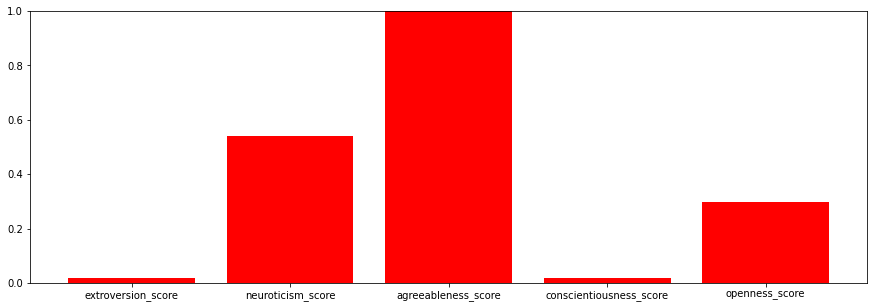

In [ ]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['two'].keys()), normalized_all_types_scores['two'].values(), color='r')
plt.show()

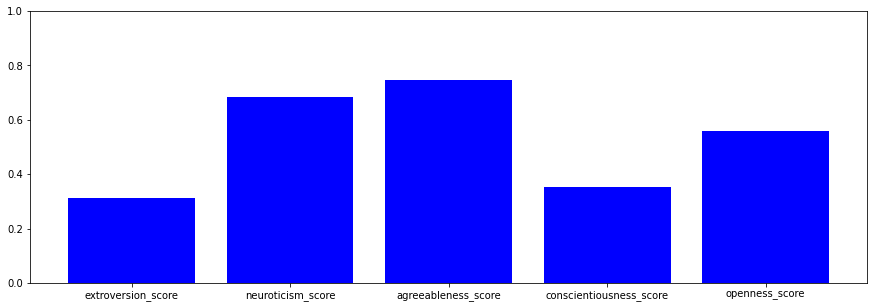

In [ ]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['three'].keys()), normalized_all_types_scores['three'].values(), color='b')
plt.show()

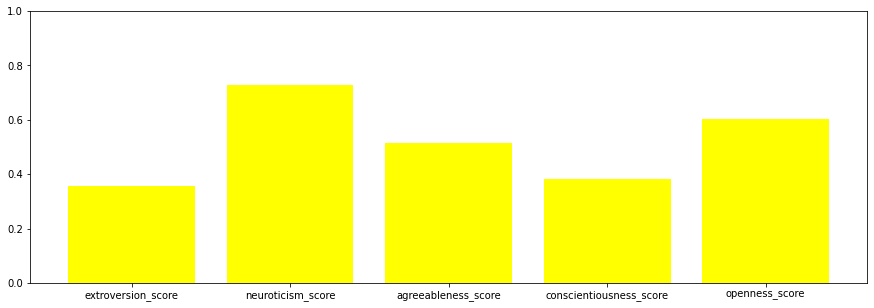

In [ ]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['four'].keys()), normalized_all_types_scores['four'].values(), color='yellow')
plt.show()

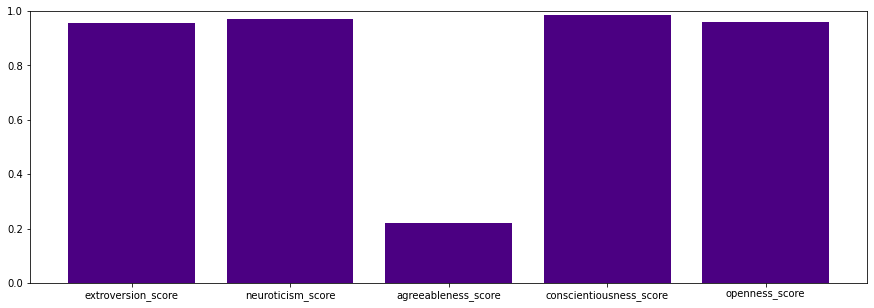

In [ ]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['five'].keys()), normalized_all_types_scores['five'].values(), color='indigo')
plt.show()

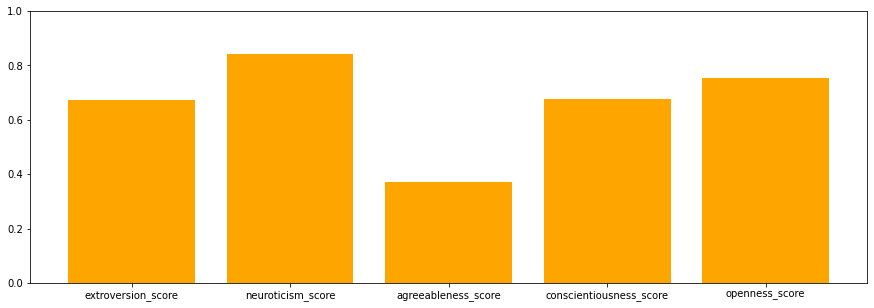

In [ ]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['six'].keys()), normalized_all_types_scores['six'].values(), color='orange')
plt.show()

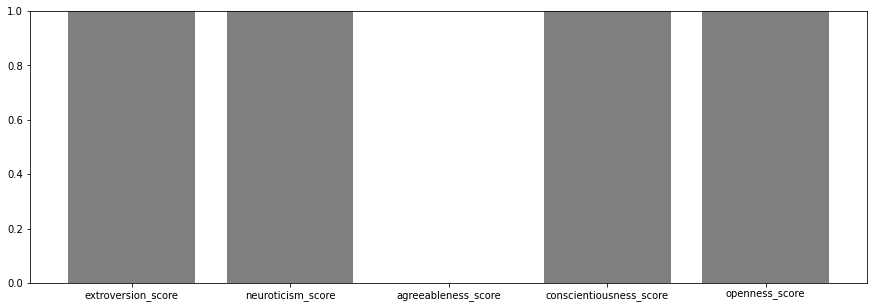

In [ ]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['seven'].keys()), normalized_all_types_scores['seven'].values(), color='grey')
plt.show()

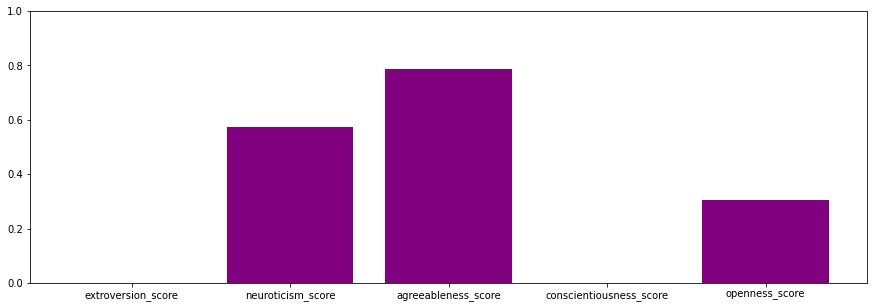

In [ ]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['eight'].keys()), normalized_all_types_scores['eight'].values(), color='purple')
plt.show()

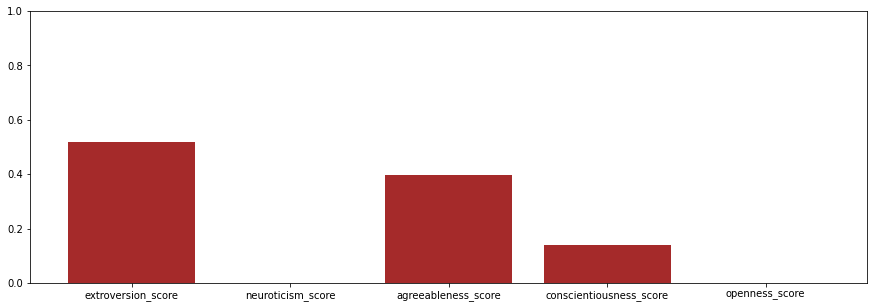

In [ ]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['nine'].keys()), normalized_all_types_scores['nine'].values(), color='brown')
plt.show()

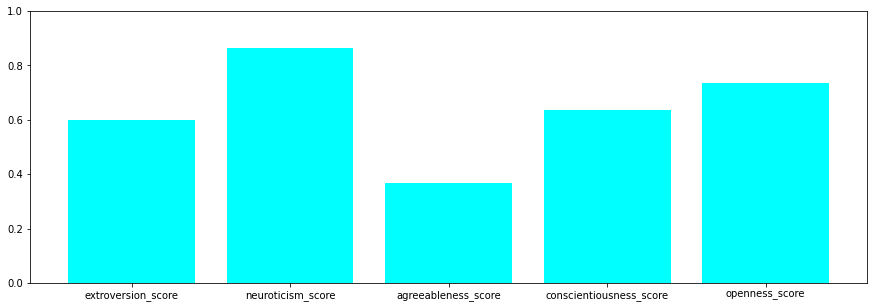

In [ ]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['ten'].keys()), normalized_all_types_scores['ten'].values(), color='aqua')
plt.show()